# Calculating Length of Shapefile in Geopandas

<AxesSubplot: >

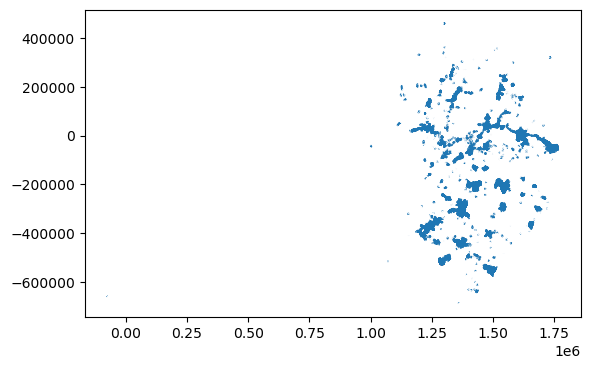

In [27]:
# Plotting Data in Python
import geopandas as gpd
from shapely.geometry import shape
shapefile = gpd.read_file("Export_Output.shp")
shapefile.plot()

In [28]:
# Coordinate System Check
shapefile.crs

<Derived Projected CRS: ESRI:102005>
Name: USA_Contiguous_Equidistant_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Conic
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
# Printing Table in Python

shapefile

,OBJECTID,b_id,len_m,AlterEn_Ft,Alteryx_Ft,USA_Cont,USA_Cylin,Shape_Leng,Dist,geometry
0,1,b145349,18133.0,59494.0,46817,46733.0,46733.0,14244.348827,None,"MULTILINESTRING ((1554292.931 35505.629, 15542..."
1,2,b145539,18307.0,60062.0,47263,47178.0,47178.0,14379.891796,None,"MULTILINESTRING ((1554292.931 35505.629, 15542..."
2,3,b356,51.0,168.0,128,128.0,128.0,38.931987,None,"MULTILINESTRING ((1336524.584 269358.569, 1336..."
3,4,b116826,338.0,1110.0,844,843.0,843.0,256.922691,None,"MULTILINESTRING ((1336524.584 269358.569, 1336..."
4,5,b1795,814.0,2672.0,2033,2030.0,2030.0,618.633483,None,"MULTILINESTRING ((1335832.360 268104.548, 1335..."
...,...,...,...,...,...,...,...,...,...,...
144327,144328,b135015,572.0,1879.0,1450,1447.0,1447.0,440.942421,None,"MULTILINESTRING ((1239004.948 143781.978, 1239..."
144328,144329,b135156,1227.0,4028.0,3108,3101.0,3101.0,945.067063,None,"MULTILINESTRING ((1239004.948 143781.978, 1239..."
144329,144330,b145413,3287.0,10786.0,8362,8347.0,8347.0,2544.255578,None,"MULTILINESTRING ((1199518.907 97798.088, 11994..."
144330,144331,b145503,5318.0,17448.0,13533,13509.0,13509.0,4117.592707,None,"MULTILINESTRING ((1198019.133 93163.892, 11980..."


In [30]:
# Changing Projection
reproject = shapefile.to_crs({'init':'epsg:4326'})

reproject.crs

C:\Users\hp\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

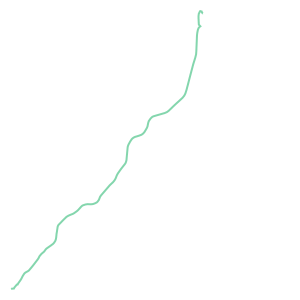

In [31]:
# Displaying a single line

shapefile.loc[0,'geometry']

In [32]:
# calculating length in ft

for i in range(len(shapefile)):
    shapefile.loc[i,'Cal_m'] = shape(shapefile.loc[i,'geometry']).length
    
# converting into ft

shapefile['cal_ft']= shapefile['Cal_m']*3.2808399
shapefile

,OBJECTID,b_id,len_m,AlterEn_Ft,Alteryx_Ft,USA_Cont,USA_Cylin,Shape_Leng,Dist,geometry,Cal_m,cal_ft
0,1,b145349,18133.0,59494.0,46817,46733.0,46733.0,14244.348827,None,"MULTILINESTRING ((1554292.931 35505.629, 15542...",14244.348827,46733.427982
1,2,b145539,18307.0,60062.0,47263,47178.0,47178.0,14379.891796,None,"MULTILINESTRING ((1554292.931 35505.629, 15542...",14379.891796,47178.122761
2,3,b356,51.0,168.0,128,128.0,128.0,38.931987,None,"MULTILINESTRING ((1336524.584 269358.569, 1336...",38.931987,127.729618
3,4,b116826,338.0,1110.0,844,843.0,843.0,256.922691,None,"MULTILINESTRING ((1336524.584 269358.569, 1336...",256.922691,842.922215
4,5,b1795,814.0,2672.0,2033,2030.0,2030.0,618.633483,None,"MULTILINESTRING ((1335832.360 268104.548, 1335...",618.633483,2029.637415
...,...,...,...,...,...,...,...,...,...,...,...,...
144327,144328,b135015,572.0,1879.0,1450,1447.0,1447.0,440.942421,None,"MULTILINESTRING ((1239004.948 143781.978, 1239...",440.942421,1446.661488
144328,144329,b135156,1227.0,4028.0,3108,3101.0,3101.0,945.067063,None,"MULTILINESTRING ((1239004.948 143781.978, 1239...",945.067063,3100.613729
144329,144330,b145413,3287.0,10786.0,8362,8347.0,8347.0,2544.255578,None,"MULTILINESTRING ((1199518.907 97798.088, 11994...",2544.255578,8347.295216
144330,144331,b145503,5318.0,17448.0,13533,13509.0,13509.0,4117.592707,None,"MULTILINESTRING ((1198019.133 93163.892, 11980...",4117.592707,13509.162446


In [33]:
#dropping Columns

shapefile.drop(labels=['Shape_Leng','Dist'],axis=1,inplace=True)

shapefile

,OBJECTID,b_id,len_m,AlterEn_Ft,Alteryx_Ft,USA_Cont,USA_Cylin,geometry,Cal_m,cal_ft
0,1,b145349,18133.0,59494.0,46817,46733.0,46733.0,"MULTILINESTRING ((1554292.931 35505.629, 15542...",14244.348827,46733.427982
1,2,b145539,18307.0,60062.0,47263,47178.0,47178.0,"MULTILINESTRING ((1554292.931 35505.629, 15542...",14379.891796,47178.122761
2,3,b356,51.0,168.0,128,128.0,128.0,"MULTILINESTRING ((1336524.584 269358.569, 1336...",38.931987,127.729618
3,4,b116826,338.0,1110.0,844,843.0,843.0,"MULTILINESTRING ((1336524.584 269358.569, 1336...",256.922691,842.922215
4,5,b1795,814.0,2672.0,2033,2030.0,2030.0,"MULTILINESTRING ((1335832.360 268104.548, 1335...",618.633483,2029.637415
...,...,...,...,...,...,...,...,...,...,...
144327,144328,b135015,572.0,1879.0,1450,1447.0,1447.0,"MULTILINESTRING ((1239004.948 143781.978, 1239...",440.942421,1446.661488
144328,144329,b135156,1227.0,4028.0,3108,3101.0,3101.0,"MULTILINESTRING ((1239004.948 143781.978, 1239...",945.067063,3100.613729
144329,144330,b145413,3287.0,10786.0,8362,8347.0,8347.0,"MULTILINESTRING ((1199518.907 97798.088, 11994...",2544.255578,8347.295216
144330,144331,b145503,5318.0,17448.0,13533,13509.0,13509.0,"MULTILINESTRING ((1198019.133 93163.892, 11980...",4117.592707,13509.162446


In [26]:
#Export your Final File to shapefile or you can use .zip to get it converted to .zip file

shapefile.to_file(filename='myshapefile.shp', driver='ESRI Shapefile')